In [2]:
import psycopg2 as pg2
from psycopg2 import extras
import pandas as pd

In [53]:
def query(sql):
#     """ insert a new row into the imdb2018 table """
    result = []
    conn = None
    
    try:
        connection = pg2.connect(user = "johnaguero",
                                      password = "torTuosity2",
                                      host = "127.0.0.1",
                                      port = "5432",
                                      database = "films")
        c = connection.cursor()
        

        c.execute(sql) 
        connection.commit()
        
        result = c.fetchall()
        
    except (Exception, pg2.Error) as error :
        if(connection):
            print("Query failed")
    finally:
        #closing database connection.
        if(connection):
            c.close()
            connection.close()
    return result        

In [119]:
sql1 = """SELECT metascore

FROM
    imdb2018
ORDER BY
    imdb_num

FETCH NEXT 50 ROWS ONLY;"""


sql2 = """SELECT Count(*) from imdb2018 where imdb_score is NULL;"""

sql3 = """SELECT Count(*) from imdb2018 where metascore is NULL;"""

sql4 = """SELECT imdb_num, metascore, imdb_score from imdb2018 where metascore is NOT NULL;"""

sql5 = """SELECT imdb_score FROM imdb2018 WHERE imdb_score is NOT NULL;"""
sql6 = """SELECT imdb_score, Votes from imdb2018 WHERE Votes is NOT NULL;"""

In [50]:
first_rows = query(sql1)
str(first_rows)


'[(None,), (None,), (67,), (None,), (None,), (87,), (68,), (None,), (86,), (None,), (87,), (88,), (66,), (None,), (87,), (74,), (90,), (69,), (82,), (66,), (None,), (65,), (67,), (84,), (88,), (None,), (62,), (84,), (81,), (None,), (83,), (64,), (None,), (79,), (64,), (64,), (64,), (67,), (77,), (None,), (71,), (87,), (None,), (61,), (None,), (None,), (None,), (None,), (76,), (67,)]'

In [49]:
iscore_null_count = query(sql2)
iscore_null_count[0][0]/ 10000

0.3527

In [56]:
mscore_null_count = query(sql3)
mscore_null_count[0][0] 

9413

In [70]:
metascore_pk_nnull = query(sql4)
metascore_pk_nnull[0][1]
metascores = [metascore_pk_nnull[i][1] for i in range(len(metascore_pk_nnull))]
metascores
imdb_scores = [metascore_pk_nnull[i][2] for i in range(len(metascore_pk_nnull))]
imdb_scores

[6.8,
 8.4,
 8.5,
 7.8,
 7.1,
 7.7,
 7.7,
 7.3,
 6.9,
 7.6,
 8.2,
 7.5,
 6.8,
 6.6,
 6.4,
 7.3,
 7.3,
 7.0,
 6.9,
 6.6,
 7.5,
 7.5,
 6.9,
 7.6,
 5.8,
 6.8,
 6.6,
 5.9,
 7.1,
 6.5,
 7.2,
 7.2,
 7.2,
 7.3,
 6.8,
 7.0,
 6.2,
 6.8,
 7.7,
 7.0,
 8.5,
 7.4,
 7.2,
 7.3,
 7.1,
 6.7,
 7.0,
 7.7,
 7.0,
 7.1,
 7.5,
 7.3,
 6.9,
 7.2,
 7.8,
 6.2,
 7.6,
 7.6,
 6.3,
 7.4,
 6.9,
 7.9,
 7.2,
 7.0,
 5.2,
 8.0,
 7.7,
 7.2,
 6.2,
 7.3,
 5.5,
 5.6,
 7.5,
 7.4,
 6.6,
 6.3,
 7.0,
 7.0,
 6.0,
 6.9,
 6.7,
 6.1,
 6.8,
 5.5,
 7.2,
 6.7,
 6.4,
 6.7,
 6.5,
 6.9,
 7.0,
 7.0,
 6.5,
 5.6,
 6.4,
 6.2,
 7.6,
 6.7,
 6.6,
 7.2,
 6.2,
 5.8,
 6.7,
 6.7,
 6.7,
 7.3,
 7.0,
 6.8,
 7.4,
 6.1,
 7.3,
 5.8,
 5.5,
 6.0,
 7.6,
 7.3,
 7.2,
 6.7,
 5.6,
 8.1,
 7.1,
 6.7,
 5.8,
 6.5,
 6.3,
 5.5,
 5.7,
 7.0,
 6.4,
 6.4,
 6.7,
 6.3,
 5.6,
 6.1,
 7.1,
 6.2,
 7.6,
 5.6,
 7.2,
 7.3,
 6.1,
 6.9,
 6.3,
 6.6,
 7.0,
 6.9,
 6.4,
 7.4,
 6.4,
 5.7,
 7.0,
 6.5,
 6.9,
 6.2,
 7.8,
 5.3,
 5.5,
 4.5,
 7.5,
 7.0,
 6.7,
 6.9,
 6.9,
 6.4,
 5.9,
 7.1,
 6.3

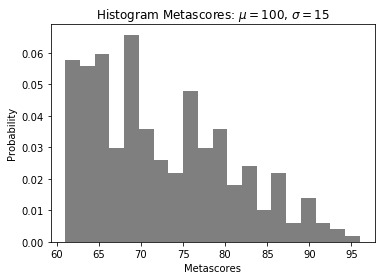

In [82]:
import numpy as np

import matplotlib.pyplot as plt

# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distributionx = mu + sigma * np.random.randn(10000)

num_bins = 20
# the histogram of the data
plt.hist(metascores, num_bins, normed=1, facecolor='k', alpha=0.5)



plt.xlabel('Metascores')
plt.ylabel('Probability')
plt.title(r'Histogram Metascores: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

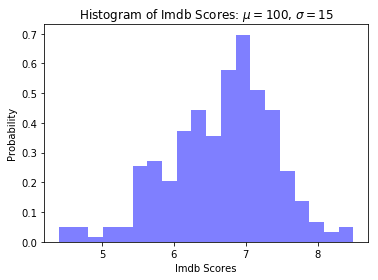

In [105]:
import numpy as np

import matplotlib.pyplot as plt

# example data
# mu =  # mean of distribution
# sigma =  # standard deviation of distributionx = mu + sigma * np.random.randn(10000)

num_bins = 20
# the histogram of the data
plt.hist(imdb_scores, num_bins,  normed=1, facecolor='blue', alpha=0.5)



plt.xlabel('Imdb Scores')
plt.ylabel('Probability')
plt.title(r'Histogram of Imdb Scores: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [120]:
ALL_imdb_scores = query(sql5)
imdbsc_nnvotes = query(sql6)
len(ALL_imdb_scores), len(imdbsc_nnvotes)

(6173, 6173)

In [121]:
a_imdbscs = [ALL_imdb_scores[i][0] for i in range(len(ALL_imdb_scores))]

In [99]:
m_array = np.asarray(metascores)

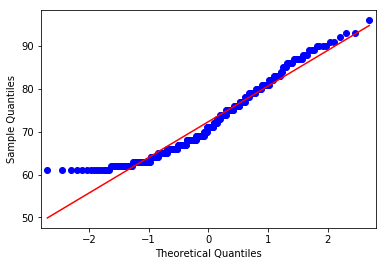

In [100]:

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(m_array, line='s')
pyplot.show()
 


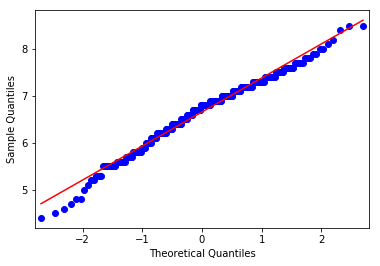

In [101]:
#### # QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(np.asarray(imdb_scores), line='s')
pyplot.show()
 

In [102]:
from scipy.stats import shapiro
# seed the random number generator

stat, p = shapiro(np.asarray(metascores))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)


In [103]:
from scipy.stats import shapiro
# seed the random number generator

stat, p = shapiro(np.asarray(imdb_scores))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.983, p=0.002
Sample does not look Gaussian (reject H0)


In [116]:
from scipy.stats import shapiro
# seed the random number generator

stat, p = shapiro(np.asarray(imdb_scores))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.983, p=0.002
Sample does not look Gaussian (reject H0)


In [122]:
n_iscores = np.asarray(a_imdbscs)

In [123]:
from scipy.stats import shapiro
# seed the random number generator

stat, p = shapiro(n_iscores)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)


/Users/johnaguero/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [124]:

# D'Agostino and Pearson's Test

from scipy.stats import normaltest
# seed the random number generator

stat, p = normaltest(n_iscores)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=256.811, p=0.000
Sample does not look Gaussian (reject H0)


In [125]:

# D'Agostino and Pearson's Test

from scipy.stats import normaltest
# seed the random number generator

stat, p = normaltest(np.asarray(metascores))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=21.309, p=0.000
Sample does not look Gaussian (reject H0)


In [127]:

# D'Agostino and Pearson's Test

from scipy.stats import normaltest
# seed the random number generator

stat, p = normaltest(np.asarray(imdb_scores), m)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

NameError: name 'm' is not defined

In [136]:
#Nonparametric Statistical Hypothesis Tests
# Mann-Whitney U Test
# Tests whether the distributions of two independent samples are equal or not.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample can be ranked.
# Interpretation

# H0: the distributions of both samples are equal.
# H1: the distributions of both samples are not equal.


from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(np.asarray(imdb_scores), np.asarray(metascores), alternative='less')

print(stat, p)

0.0 8.28616492986e-96
